<a href="https://colab.research.google.com/github/atufa-khan/100pythonque/blob/main/EDA_Proejct_atufa_khan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Q1. Import the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Q2.import csv file Diwali Sales Data.csv

In [3]:
from google.colab import files

uploaded = files.upload()


Saving Diwali Sales Data.csv to Diwali Sales Data (1).csv


## Q3. Find the shape of the data

In [8]:
dataset = pd.read_csv("Diwali Sales Data.csv", encoding='ISO-8859-1')


In [40]:
shape = dataset.shape
print("Shape of the dataset:", shape)

Shape of the dataset: (11251, 13)


## Q4. Fetch the first five rows of the dataset

In [41]:
import pandas as pd
dataset.head()




,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


## Q5. Get the complete info of the dataset

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## Q6. Drop unrelated/blank columns 'Status' and 'unnamed1'

In [15]:
dataset.drop(columns=['Status', 'unnamed1'], inplace=True)


## Q7. Check for null values and find which columns have null values

In [17]:
print( dataset.isnull().sum())


User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64


## Q8. Calculate the mean value of Age, Orders and Amount by using describe function

In [18]:
dataset[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11239.000000
mean,35.421207,2.489290,9453.610858
std,12.754122,1.115047,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Q9. Plot a bar chart for Gender and it's count

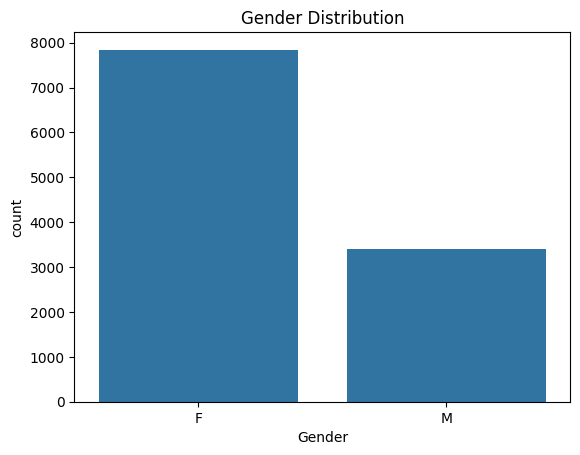

In [20]:
sns.countplot(data=dataset, x='Gender')
plt.title('Gender Distribution')
plt.show()


## Q10. Plot a bar chart for gender vs total amount

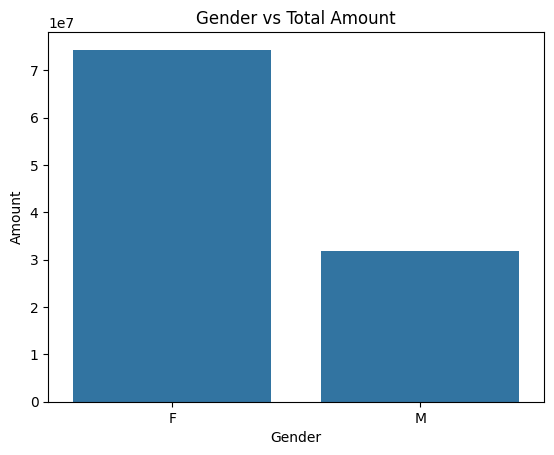

In [21]:

gender_amount=dataset.groupby('Gender')['Amount'].sum().reset_index()
sns.barplot(data=gender_amount,x='Gender',y='Amount')
plt.title('Gender vs Total Amount')
plt.show()

## Q11. Plot the countplot for Age Group with hue and Gender

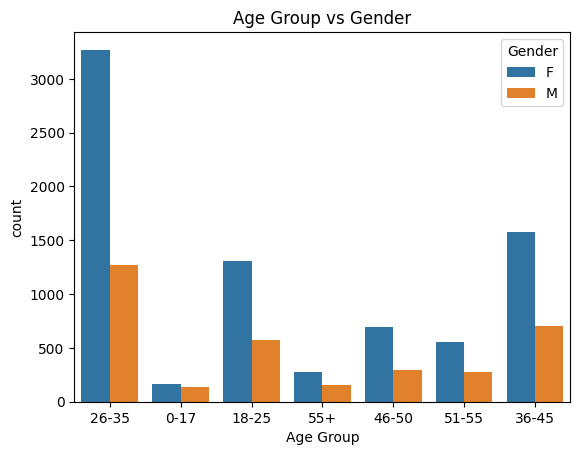

In [23]:
sns.countplot(data=dataset, x='Age Group', hue='Gender')
plt.title('Age Group vs Gender')
plt.show()


## Q12. Draw the plot for total number of orders from top 10 states

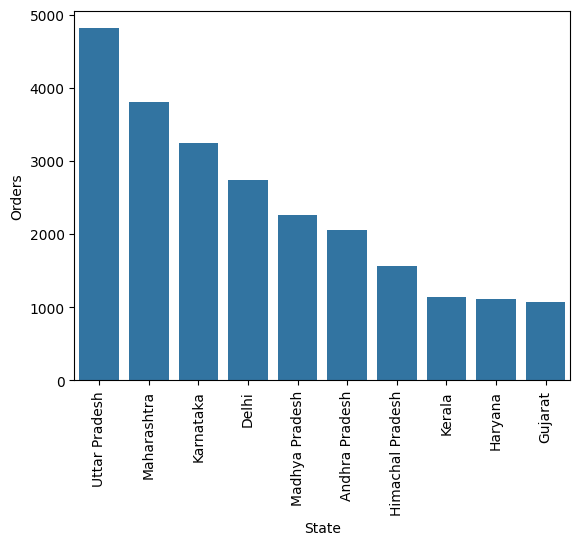

In [27]:
top = dataset.groupby('State')['Orders'].sum().nlargest(10).reset_index()
sns.barplot(data=top, x='State', y='Orders')
plt.xticks(rotation=90)
plt.show()


## Q13.Draw the plot to plot total amount/sales from top 10 states

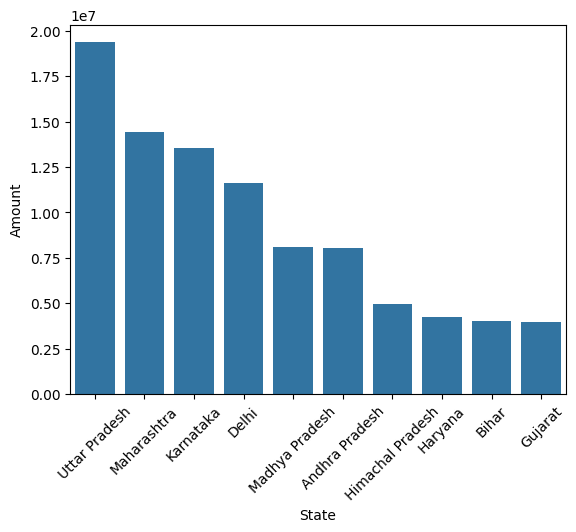

In [28]:
states_amount = dataset.groupby('State')['Amount'].sum().nlargest(10).reset_index()
sns.barplot(data=states_amount, x='State', y='Amount')
plt.xticks(rotation=45)
plt.show()


## Q14. Draw the plot to show the marital status

<ipython-input-45-bac3502c3d9a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Marital_Status', palette='pastel')


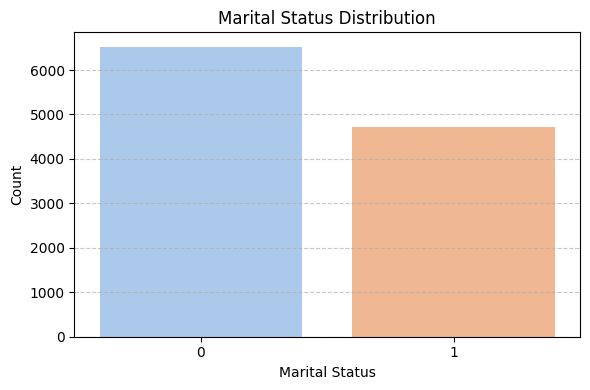

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(data=dataset, x='Marital_Status', palette='pastel')

plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Q15. Draw the plot to show the top 10 occuoations

Occupation
IT Sector      1588
Healthcare     1408
Aviation       1310
Banking        1139
Govt            854
Hospitality     705
Media           637
Automobile      566
Chemical        542
Lawyer          531
Name: count, dtype: int64


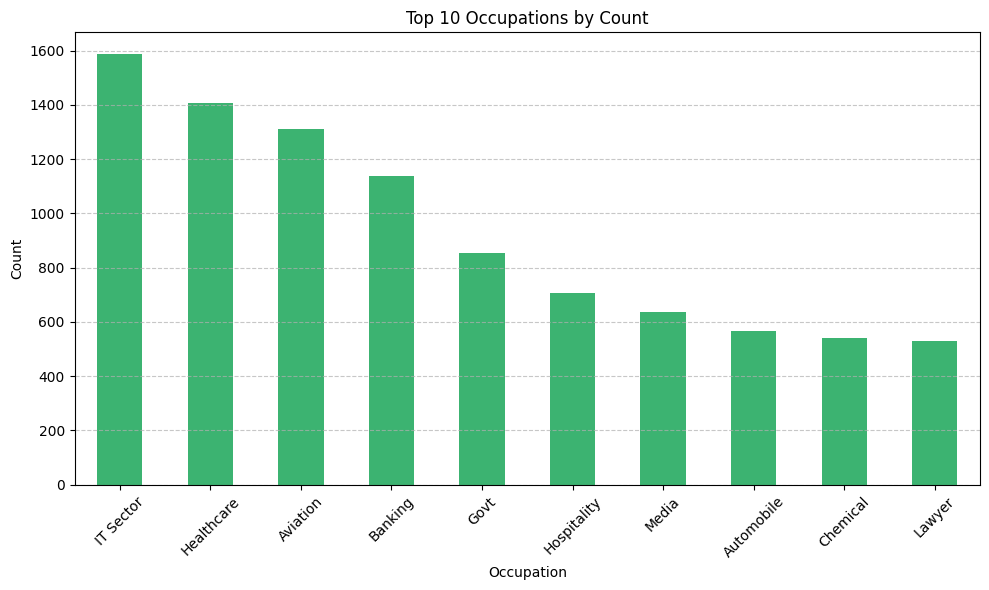

In [44]:

occupation_counts = dataset['Occupation'].value_counts().head(10)
print(occupation_counts)
plt.figure(figsize=(10,6))
occupation_counts.plot(kind='bar', color='mediumseagreen')

plt.title('Top 10 Occupations by Count')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Q16. Draw the countplot to print the top 10 categories

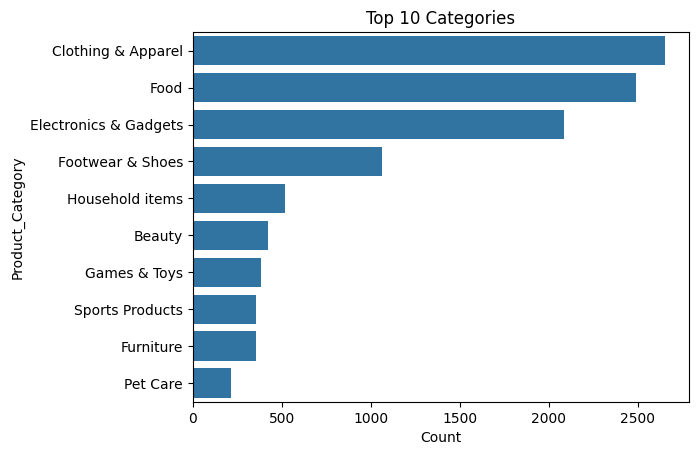

In [34]:


top_categories = dataset['Product_Category'].value_counts().nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Categories')
plt.xlabel('Count')
plt.show()


## Q17. What is the prodct ID of the top 10 most sold products.

In [37]:
top_products = dataset['Product_ID'].value_counts().head(10)
print(top_products)


Product_ID
P00265242    53
P00110942    44
P00184942    37
P00237542    35
P00112142    34
P00114942    33
P00110742    32
P00145042    30
P00112542    30
P00110842    30
Name: count, dtype: int64


## Q18. What conclusion you can draw from the above visualizations.

In [ ]:
top occupation sector is IT
TOP  prodcut_category is clothing and apparel
most sold product ID is P00265242  and product count  53
total amount/sales from top 10 states is Uttar Pradesh
age group 26-32
female buys more product than male

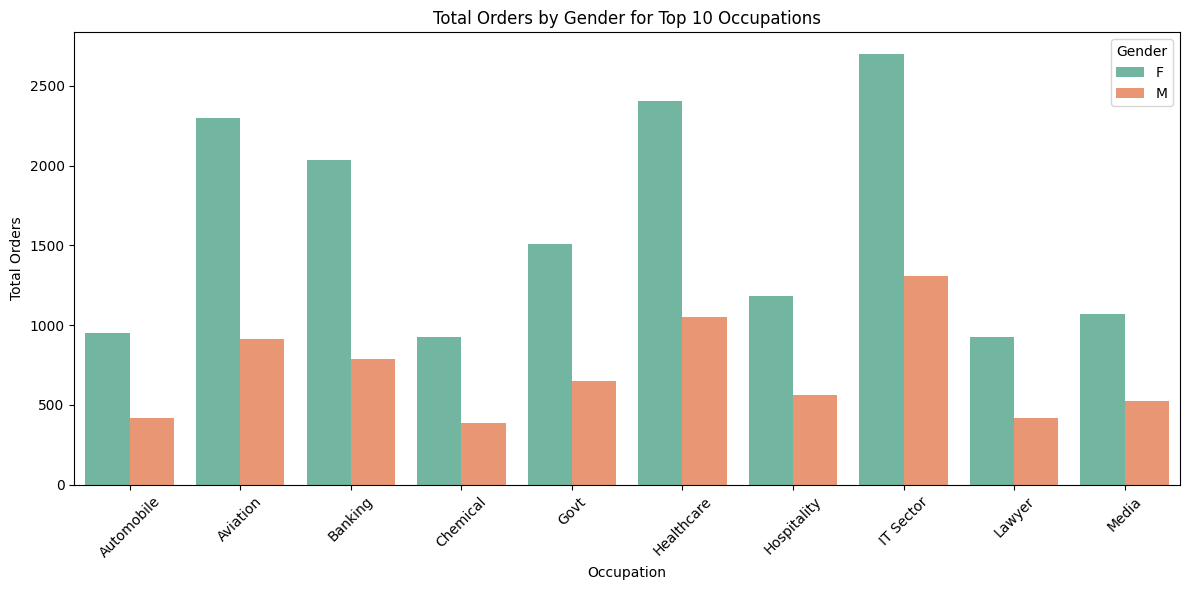

In [50]:
top_occ = dataset['Occupation'].value_counts().head(10).index
filtered_data = dataset[dataset['Occupation'].isin(top_occ)]
grouped = filtered_data.groupby(['Occupation', 'Gender'])['Orders'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x='Occupation', y='Orders',hue='Gender', palette='Set2')
plt.title('Total Orders by Gender for Top 10 Occupations')
plt.xlabel('Occupation')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()